# Exploratory Data Analysis (EDA) on the business dataset from Yelp

#### This analysis would generate summary statistics for the various numerical data in the dataset, present various important features of the dataset and their meaning and also create various graphical representations to understand the business dataset better


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-surprise
!pip install fuzzywuzzy

  Using cached scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 306 kB 59.7 MB/s 
  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)


In [ ]:
# library imports

import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import json,os
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import fuzzywuzzy
from fuzzywuzzy import process
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings('ignore')
import re

import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 

# graph viz
import plotly.offline as pyo

from plotly.graph_objs import *
import plotly.graph_objs as go

#map section
import imageio
import folium
import folium.plugins as plugins


# import chardet

# from nltk.tokenize import RegexpTokenizer
# from stop_words import get_stop_words
# from wordcloud import WordCloud, STOPWORDS
#viz


/usr/local/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Reading the raw json business dataset file and displaying the structure :

In [ ]:
business_path = '/content/drive/MyDrive/CMPE256/Data/yelp_academic_dataset_business.json'

In [ ]:
business = pd.read_json(business_path, lines=True)

In [ ]:
print("\n================================Display of the raw business data of Yelp dataset===========================\n")
business.head()


================================Display of the raw business data of Yelp dataset===========================



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
print("\n============================Display of the columns in business data of Yelp dataset=======================\n")
business.columns


============================Display of the columns in business data of Yelp dataset=======================



Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

### Display of Yelp business data distribution on the map:

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!conda install -c conda-forge basemap-data-hires --yes

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

# All requested packages already installed.



In [ ]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
     \ 129.7 MB 81 kB/s
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [ ]:
!pip install -q pyproj==1.9.6

     |████████████████████████████████| 2.8 MB 5.0 MB/s 


In [ ]:
!pip install Basemap

     |████████████████████████████████| 862 kB 4.8 MB/s 
     |████████████████████████████████| 15.7 MB 41.2 MB/s 
     |████████████████████████████████| 219 kB 49.2 MB/s 
     |████████████████████████████████| 11.2 MB 38.1 MB/s 
     |████████████████████████████████| 40 kB 5.4 MB/s 
     |████████████████████████████████| 98 kB 6.6 MB/s 
     |████████████████████████████████| 247 kB 46.6 MB/s 
     |████████████████████████████████| 4.3 MB 35.0 MB/s 
     |████████████████████████████████| 1.1 MB 45.5 MB/s 
     |████████████████████████████████| 930 kB 46.8 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37263 sha256=da59c354dcff9d13f7acac97a921302eb6048a79fad7e39735ab57647e5e30d0
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [ ]:
!pip install matplotlib==3.1.3
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# %matplotlib inline

     |████████████████████████████████| 13.1 MB 5.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2


In [ ]:
#imports for Basemap
import os
!conda install basemap
!conda install mpl_toolkits.basemap
!conda install -c conda-forge basemap-data-hires --yes
os.environ['PROJ_LIB'] = 'C:/Users/shouv/Anaconda3/Lib/site-packages/mpl_toolkits/basemap'
from mpl_toolkits.basemap import Basemap

# used to fix a n error conda install -c conda-forge basemap-data-hires --yes

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / failed with repodata from current_repodata.json, will retry with next repodata source.

ResolvePackageNotFound: 
  - conda==4.9.2

Solving environment: / failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - mpl_toolkits.basemap

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch

To search for alternate 

In [ ]:
# Reducing it down to only the North American region 
long_min, long_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715,56.395664

index_NA = (business["longitude"]>long_min) &\
            (business["longitude"]<long_max) &\
            (business["latitude"]>lat_min) &\
            (business["latitude"]<lat_max)
#apply the selector to subset
NA_business_yelp=business[index_NA ]

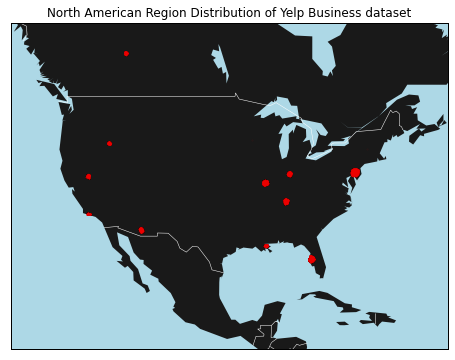

In [ ]:
#figure initialization
plt.figure(figsize=(12,6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=long_min,
             urcrnrlon=long_max,
             lat_ts=35,
            )

m2.fillcontinents(color='#191919',lake_color='lightBlue') 
m2.drawmapboundary(fill_color='lightBlue')                
m2.drawcountries(linewidth=0.5, color="w")              # thin white line for country borders

# Plotting the data
mxy = m2(NA_business_yelp["longitude"].tolist(), NA_business_yelp["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="red", lw=0, alpha=0.05, zorder=5)

plt.title("North American Region Distribution of Yelp Business dataset")
plt.savefig('business_distribution.png')

### Evaluating the different features and checking on null values or duplicate entries:

In [ ]:
print("\nDisplay of the column 'categories' no of null rows : ", business.categories.isnull().sum())

#filling the null values with " " empty string
business.categories = business.categories.fillna(" ")



Display of the column 'categories' no of null rows :  103


In [ ]:
#Checking whether there are any duplicate entries
business.business_id.describe()

count                     150346
unique                    150346
top       Pns2l4eNsfO8kk83dixA6A
freq                           1
Name: business_id, dtype: object

####  Hence, there are no duplicate entries as there are no recurring business ids 

### Displaying the various businesses present in the Yelp Dataset and their respective count:

In [ ]:
complete_business = business.assign(categories = business.categories.str.split(', ')).explode('categories')
category = complete_business.categories.value_counts()
category = category.to_frame().reset_index()
category.columns = ['Categories', 'Count']
print("\n============================Displaying the different business categories present on Yelp=======================\n")
category


============================Displaying the different business categories present on Yelp=======================



,Categories,Count
0,Restaurants,52268
1,Food,27781
2,Shopping,24395
3,Home Services,14356
4,Beauty & Spas,14292
...,...,...
1307,Patent Law,1
1308,Hainan,1
1309,Housing Cooperatives,1
1310,Guamanian,1


#### We can see that there are a total of 1311 categories of various different businesses.

### Displaying the top 10 businesses in the Yelp dataset:

In [ ]:
category= category.sort_values(by = 'Count', ascending = False)

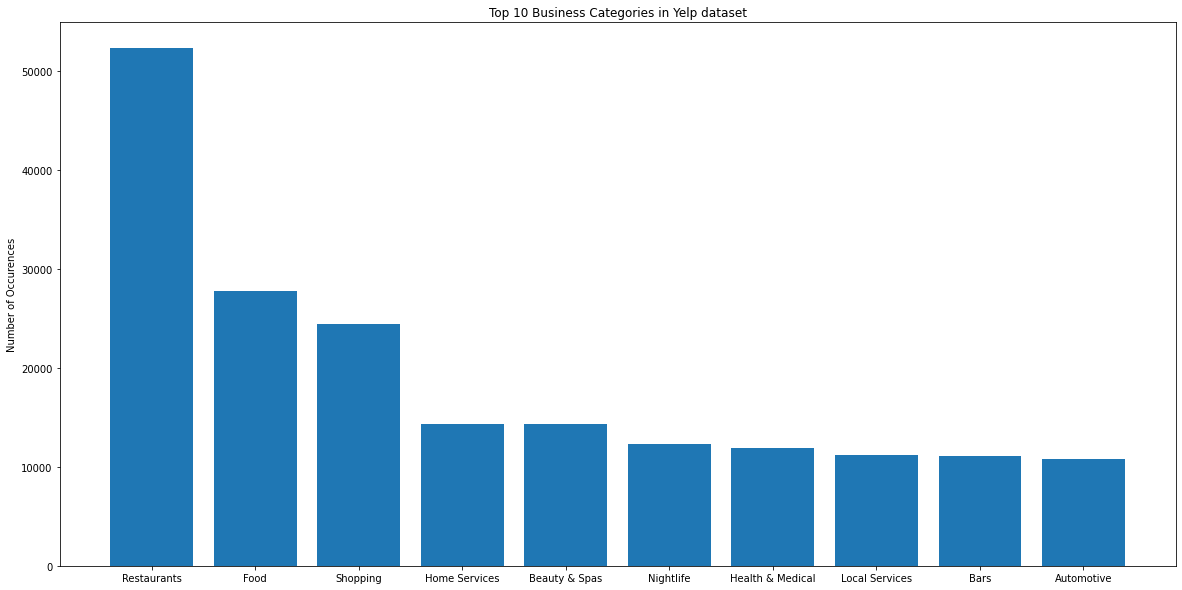

In [ ]:
category = category[0:10]
objects = list(category.Categories)
y_pos = np.arange(len(objects))
Numbers = list(category.Count)

fig = plt.figure(figsize=(20,10))
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Top 10 Business Categories in Yelp dataset')
plt.savefig('top_10_business_categories.png')

#### We could infer that most of the data is based on the Restaurant and Food business therefore this dataset would be a good pick to recommend restaurants to various users. We would also now filter out  'Restaurant' or 'Food' in their categories column and store it in a dataframe as we narrow down towards the required datafram for our Restaurant recommendation system.

### Extracting now only the Restaurant and Food businesses from Yelp dataset:

In [ ]:
# creating a dataframe to store all the records which has 'Restaurants' or 'Food' in their categories column 
restaurant_dataframe = pd.DataFrame()
for i in business.index:
    if 'Restaurants' in business.categories[i] or 'Food' in business.categories[i]:
        restaurant_dataframe =restaurant_dataframe.append(business.iloc[i])

In [ ]:
restaurant_dataframe = restaurant_dataframe.reset_index(drop=True)
restaurant_dataframe.info()
restaurant_dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64616 entries, 0 to 64615
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   64616 non-null  object 
 1   name          64616 non-null  object 
 2   address       64616 non-null  object 
 3   city          64616 non-null  object 
 4   state         64616 non-null  object 
 5   postal_code   64616 non-null  object 
 6   latitude      64616 non-null  float64
 7   longitude     64616 non-null  float64
 8   stars         64616 non-null  float64
 9   review_count  64616 non-null  float64
 10  is_open       64616 non-null  float64
 11  attributes    63740 non-null  object 
 12  categories    64616 non-null  object 
 13  hours         55281 non-null  object 
dtypes: float64(5), object(9)
memory usage: 6.9+ MB


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80.0,1.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13.0,1.0,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6.0,1.0,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
3,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19.0,0.0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
4,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10.0,1.0,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64611,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33.0,1.0,"{'WiFi': ''free'', 'RestaurantsGoodForGroups':...","Cafes, Juice Bars & Smoothies, Coffee & Tea, R...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-17:0', '..."
64612,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,4.5,41.0,1.0,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-14:0', '..."
64613,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35.0,1.0,"{'WheelchairAccessible': 'False', 'Restaurants...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
64614,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,19014,39.856185,-75.427725,4.5,14.0,1.0,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [ ]:
# display of the attributes column of the restaurant datadframe created
restaurant_dataframe['attributes'][0]

{'Alcohol': "u'none'",
 'BikeParking': 'True',
 'BusinessAcceptsCreditCards': 'False',
 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
 'ByAppointmentOnly': 'False',
 'Caters': 'True',
 'OutdoorSeating': 'False',
 'RestaurantsDelivery': 'False',
 'RestaurantsPriceRange2': '1',
 'RestaurantsTakeOut': 'True',
 'WiFi': "u'free'"}

In [ ]:
# Taking into the consideration the restaurant businesses which are open
# 1 = open, 0 = closed
restaurant_dataframe = restaurant_dataframe[restaurant_dataframe['is_open']==1]

In [ ]:
# Considering US states only

states = pd.Series(["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"])

### Graphical display of average rating stars given to the Restaurants across each state in US:

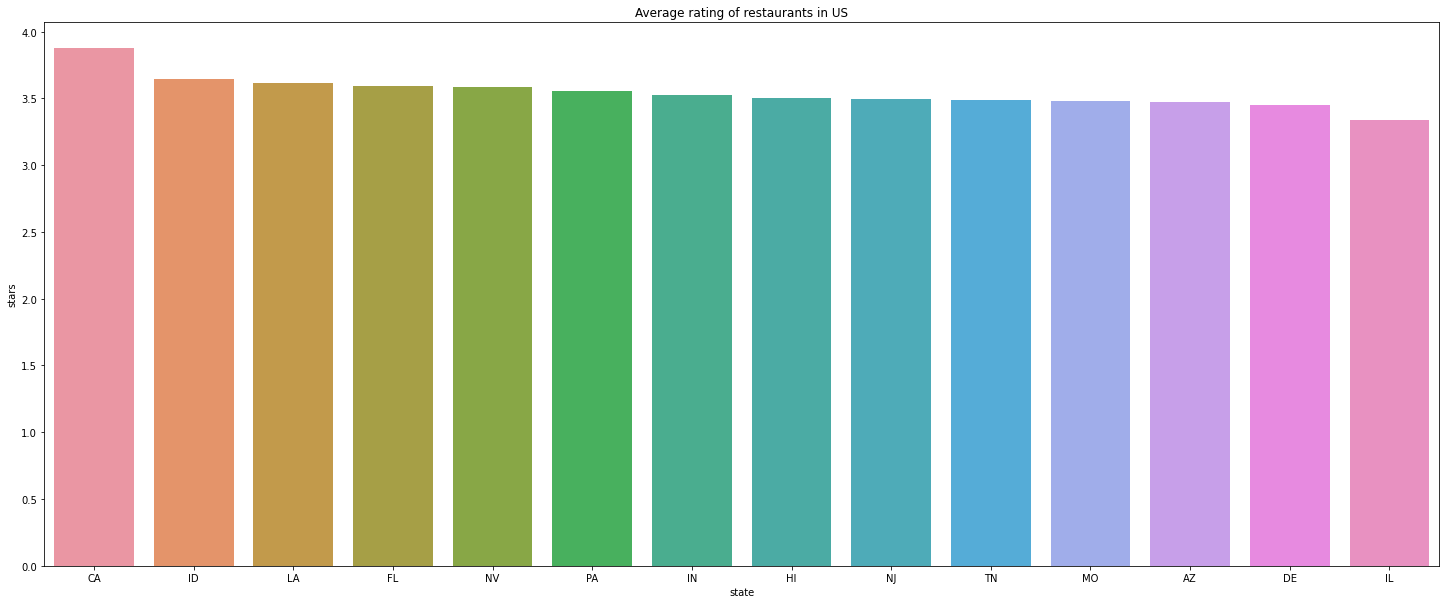

In [ ]:
avg_stars = pd.pivot_table(restaurant_dataframe[restaurant_dataframe['state'].isin(states)] , index = ['state'], 
                    values = ['stars'], aggfunc = np.mean)

avg_stars=avg_stars.sort_values('stars',ascending=False)

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
a = sns.barplot(x=avg_stars.index, y="stars", data=avg_stars)
plt.title('Average rating of restaurants in US')
plt.savefig('average_rating_of_US_states.png')

### Distribution of restaurants state-wise in the dataframe:

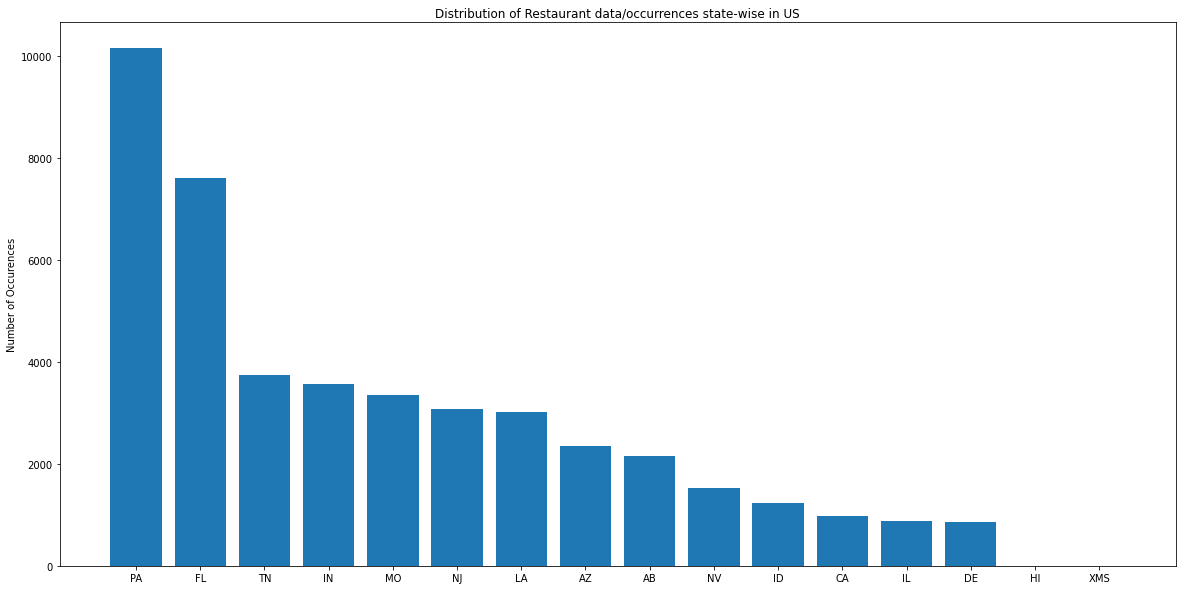

In [ ]:
state_count = restaurant_dataframe.state.value_counts()

state_count = state_count.to_frame().reset_index()
state_count.columns = ['State', 'Counts']

objects = list(state_count.State)
y_pos = np.arange(len(objects))
Numbers = list(state_count.Counts)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Distribution of Restaurant data/occurrences state-wise in US')
plt.savefig('state-wise_restaurant_distribution_in_US.png')

#### From this, graph, we could statewise distribution of restaurants. As we can see, this data consists of restaurants present all over, fornour analysis we would take the restaurants in California.

### Analysis of restaurants in California state only:

In [ ]:
business_in_CA = restaurant_dataframe[restaurant_dataframe.state == 'CA']
business_in_CA = business_in_CA.reset_index(drop = True)
print("\n============================Display of the restaurant businesses in California only=======================\n")
business_in_CA.head()


============================Display of the restaurant businesses in California only=======================



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389.0,1.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
1,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404.0,1.0,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
2,ifjluUv4VASwmFqEp8cWlQ,Marty's Pizza,2733 De La Vina St,Santa Barbara,CA,93105,34.436236,-119.726147,4.0,64.0,1.0,"{'Alcohol': 'u'none'', 'BusinessAcceptsCreditC...","Pizza, Restaurants","{'Tuesday': '11:0-21:30', 'Wednesday': '11:0-2..."
3,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,"7320 Hollister Ave, Ste 1",Goleta,CA,93117,34.430542,-119.882367,4.0,189.0,1.0,"{'RestaurantsGoodForGroups': 'True', 'Business...","Burgers, Cafes, Restaurants, Mexican, American...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:30', ..."
4,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,903 Embarcadero Del Norte,Isla Vista,CA,93117,34.412934,-119.855531,3.0,184.0,1.0,"{'RestaurantsDelivery': 'True', 'BikeParking':...","Food, Restaurants, Chinese, Bubble Tea, Vietna...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [ ]:
# type(business_in_CA.attributes[1])
# dict

### The 'attributes' column here contains features which we can use to make the recommendations more suitable therefore this column is further spread out into difffrent attribute columns:

In [ ]:
def find_superset_of_column_names(data):
    column_names = set()
    
    for line_contents in data:
        column_names.update(
                set(find_column_names(line_contents))
                )
    return column_names

def find_column_names(line_contents):
    column_names = []
    if line_contents is None:
        return ''
    for k in line_contents.keys():
        column_names.append('{0}'.format(k)
        )
    
    return column_names

In [ ]:
superset_cols = find_superset_of_column_names(business_in_CA.attributes)

# put all those columns in the dataset and initilize them to nan
for col in superset_cols:
    business_in_CA[col]= np.nan

idx = 0
for attr in business_in_CA.attributes:
    if attr is None:
        idx+=1
        continue
    for k,v in attr.items():
        if'{' in v:
            continue
        business_in_CA[k][idx] = v
    idx+=1

In [ ]:
null_val = pd.DataFrame(business_in_CA.isna().sum())
print("Null values: ",null_val)
print("Shape of original data", business_in_CA.shape)
business_in_CA.info()

Null values:                                0
business_id                   0
name                          0
address                       0
city                          0
state                         0
postal_code                   0
latitude                      0
longitude                     0
stars                         0
review_count                  0
is_open                       0
attributes                   13
categories                    0
hours                        75
Smoking                     908
RestaurantsAttire           496
BestNights                  986
RestaurantsGoodForGroups    457
RestaurantsPriceRange2      166
RestaurantsDelivery         207
WiFi                        317
GoodForMeal                 983
BYOBCorkage                 934
NoiseLevel                  446
HasTV                       408
RestaurantsReservations     416
BikeParking                 187
Ambience                    982
BusinessParking             971
CoatCheck                 

### Dropping the columns with maximum number of null values:

In [ ]:
col_del = list(null_val[null_val.iloc[:,0] >300].index)# columns to keep
col_del

business_in_CA.drop(columns=col_del).isna().sum()
business_in_CA = business_in_CA.drop(columns=col_del)
business_in_CA

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,RestaurantsPriceRange2,RestaurantsDelivery,BikeParking,RestaurantsTakeOut,BusinessAcceptsCreditCards,Caters
0,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389.0,1.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...",2.0,None,True,True,True,True
1,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404.0,1.0,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",2.0,True,True,True,True,False
2,ifjluUv4VASwmFqEp8cWlQ,Marty's Pizza,2733 De La Vina St,Santa Barbara,CA,93105,34.436236,-119.726147,4.0,64.0,1.0,"{'Alcohol': 'u'none'', 'BusinessAcceptsCreditC...","Pizza, Restaurants","{'Tuesday': '11:0-21:30', 'Wednesday': '11:0-2...",2.0,True,NaN,True,True,NaN
3,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,"7320 Hollister Ave, Ste 1",Goleta,CA,93117,34.430542,-119.882367,4.0,189.0,1.0,"{'RestaurantsGoodForGroups': 'True', 'Business...","Burgers, Cafes, Restaurants, Mexican, American...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:30', ...",1.0,True,True,True,True,True
4,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,903 Embarcadero Del Norte,Isla Vista,CA,93117,34.412934,-119.855531,3.0,184.0,1.0,"{'RestaurantsDelivery': 'True', 'BikeParking':...","Food, Restaurants, Chinese, Bubble Tea, Vietna...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1.0,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,2xxkaRy7rP5EUyjFt2J5kA,Nikka Ramen,5701 Calle Real,Goleta,CA,93117,34.440885,-119.823523,4.5,562.0,1.0,"{'ByAppointmentOnly': 'False', 'Alcohol': 'u'b...","Restaurants, Japanese, Ramen","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...",2.0,True,True,True,True,False
982,8IV78gQwTH-eZgbfFS_plg,Lost & Found Cafe,919 Linden Ave,Carpinteria,CA,93013,34.398568,-119.519034,5.0,5.0,1.0,None,"Home Decor, Home & Garden, Coffee & Tea, Food,...",None,NaN,NaN,NaN,NaN,NaN,NaN
983,IRBhPAC4ZoDpXazpoB3epQ,Good Stuff Baked Treats,,Santa Barbara,CA,93101,34.420334,-119.710749,5.0,9.0,1.0,"{'BikeParking': 'False', 'RestaurantsPriceRang...","Food, Food Delivery Services, Bakeries, Desser...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",2.0,True,False,True,True,True
984,Bo-GGwQNcLVwyKeYkbfAYg,Vino Divino,2012 De La Vina St,Santa Barbara,CA,93105,34.429154,-119.717222,5.0,19.0,1.0,"{'BusinessParking': '{'garage': False, 'street...","Event Planning & Services, Wine Tasting Room, ...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-18:0', ...",2.0,False,True,False,True,False


### Splitting the contents in 'category' attribute

In [ ]:
business_in_CA.shape

(986, 20)

In [ ]:
category_elements = []
for i in business_in_CA.index:
    elements = business_in_CA.categories[i].split(',')
    for element in elements:
        category_elements.append(element)

In [ ]:
category_elements = [x.strip(' ') for x in category_elements]
category_elements

['Food',
 'Restaurants',
 'Salad',
 'Coffee & Tea',
 'Breakfast & Brunch',
 'Sandwiches',
 'Bakeries',
 'Live/Raw Food',
 'Restaurants',
 'Seafood',
 'Beer Bar',
 'Beer',
 'Wine & Spirits',
 'Bars',
 'Food',
 'Nightlife',
 'Pizza',
 'Restaurants',
 'Burgers',
 'Cafes',
 'Restaurants',
 'Mexican',
 'American (Traditional)',
 'Food',
 'Restaurants',
 'Chinese',
 'Bubble Tea',
 'Vietnamese',
 'Chicken Wings',
 'Salad',
 'Restaurants',
 'Pizza',
 'Italian',
 'Sandwiches',
 'Coffee & Tea',
 'Coffee Roasteries',
 'Food',
 'Restaurants',
 'Thai',
 'Beer',
 'Wine & Spirits',
 'Pubs',
 'Arts & Entertainment',
 'Kombucha',
 'Nightlife',
 'Wineries',
 'Food',
 'Bars',
 'Beer Bar',
 'Themed Cafes',
 'Cafes',
 'Pets',
 'Arts & Entertainment',
 "Women's Clothing",
 'Coffee & Tea',
 'Shopping',
 'Pet Adoption',
 'Fashion',
 'Pet Sitting',
 'Accessories',
 'Pet Stores',
 'Pet Services',
 'Food',
 'Restaurants',
 'Food',
 'Food Delivery Services',
 'Burgers',
 'Pizza',
 'Caterers',
 'Event Planning & S

In [ ]:
# we are taking 20 most common categories
Counter(category_elements).most_common(20)

[('Restaurants', 668),
 ('Food', 570),
 ('Nightlife', 153),
 ('Bars', 142),
 ('Breakfast & Brunch', 118),
 ('Coffee & Tea', 114),
 ('Sandwiches', 114),
 ('Mexican', 111),
 ('American (New)', 109),
 ('Event Planning & Services', 99),
 ('American (Traditional)', 96),
 ('Beer', 90),
 ('Wine & Spirits', 90),
 ('Arts & Entertainment', 86),
 ('Specialty Food', 83),
 ('Shopping', 76),
 ('Burgers', 71),
 ('Wineries', 69),
 ('Grocery', 68),
 ('Pizza', 67)]

In [ ]:
features = Counter(category_elements).most_common(20)
feature = [x[0] for x in features]

for col in feature:
    business_in_CA[col]= np.nan
for i in feature:
    for index in business_in_CA.index:
        
        if i in business_in_CA.categories[index]:
            business_in_CA[i][index] = 1
        else:
            business_in_CA[i][index] = 0

In [ ]:
(business_in_CA.columns)

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'RestaurantsPriceRange2',
       'RestaurantsDelivery', 'BikeParking', 'RestaurantsTakeOut',
       'BusinessAcceptsCreditCards', 'Caters', 'Restaurants', 'Food',
       'Nightlife', 'Bars', 'Breakfast & Brunch', 'Coffee & Tea', 'Sandwiches',
       'Mexican', 'American (New)', 'Event Planning & Services',
       'American (Traditional)', 'Beer', 'Wine & Spirits',
       'Arts & Entertainment', 'Specialty Food', 'Shopping', 'Burgers',
       'Wineries', 'Grocery', 'Pizza'],
      dtype='object')

In [ ]:
## Checking for inconsistent city names
cities = business_in_CA['city'].unique()
cities

array(['Santa Barbara', 'Goleta', 'Isla Vista', 'Carpinteria',
       'Montecito', 'Port Hueneme', 'Summerland', 'Santa  Barbara',
       'Truckee', 'Santa Maria'], dtype=object)

In [ ]:
## There only city with inconsistent name is Saint Joseph, so we will update that
business_in_CA['city'] = business_in_CA['city'].str.lower()
business_in_CA['city'] = business_in_CA['city'].str.strip()

def replace_matches(df, column, string_to_match, min_ratio = 80):
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    rows_with_matches = df[column].isin(close_matches)
    df.loc[rows_with_matches, column] = string_to_match
    
for city in cities:
    replace_matches(business_in_CA, column='city', string_to_match=city)

business_in_CA['city'].unique()

array(['Santa  Barbara', 'Goleta', 'Isla Vista', 'Carpinteria',
       'Montecito', 'Port Hueneme', 'Summerland', 'Truckee',
       'Santa Maria'], dtype=object)

In [ ]:
city_CA = business_in_CA.city.value_counts()
city_CA = city_CA.to_frame().reset_index()
city_CA.columns = ['City', 'Counts']

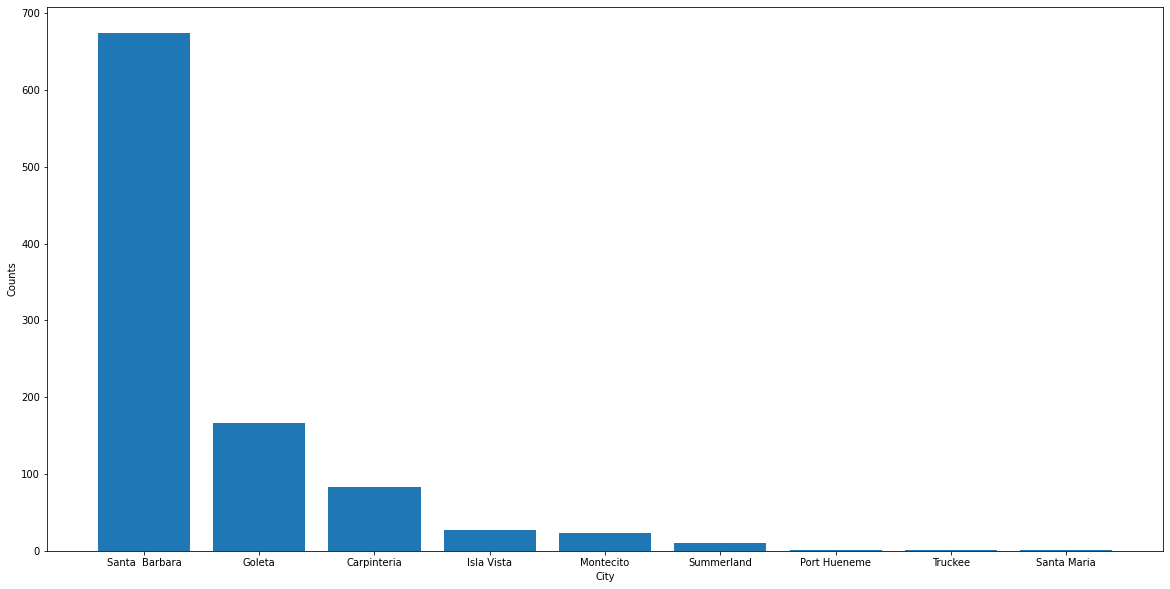

In [ ]:
### Distribuiton of restaurant business in California
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(city_CA.City, city_CA.Counts, align = 'center', alpha = 1)
plt.xlabel("City")
plt.ylabel("Counts")
plt.savefig('California_city_wise_restaurant_counts.png')

#### From the above graph we could see that are data is very skewed data based on the cities which have the restaurant reviews


### Analysing Restaurants in California who got 5-star ratings and their count:

In [ ]:
import json
reviews = []
with open('/content/drive/MyDrive/CMPE256/Data/yelp_academic_dataset_review.json',encoding="utf8") as f:
    for line in f:
        reviews.append(json.loads(line))

In [ ]:
reviews = pd.DataFrame(reviews)
business_ratings = pd.merge(business_in_CA, reviews[['review_id', 'business_id', 'stars']], on = 'business_id', how = 'left')
Five_star = business_ratings[business_ratings['stars_y'] == 5.0]
Five_star_rating = Five_star.name.value_counts()
Five_star_rating = Five_star_rating.to_frame().reset_index()
Five_star_rating.columns = ['Restaurant', 'Counts']
Five_star_rating = Five_star_rating.head(10)
Five_star_rating = Five_star_rating.sort_values(['Counts'], ascending = True)
Five_star_rating

,Restaurant,Counts
9,Bouchon,971
8,Lure Fish House,980
7,Santa Barbara Shellfish Company,1022
6,Lilly's Tacos,1109
5,McConnell's Fine Ice Creams,1230
4,Boathouse at Hendry's Beach,1274
3,Brophy Bros - Santa Barbara,1355
2,Mesa Verde,1523
1,Pickles & Swiss,1533
0,Los Agaves,3464


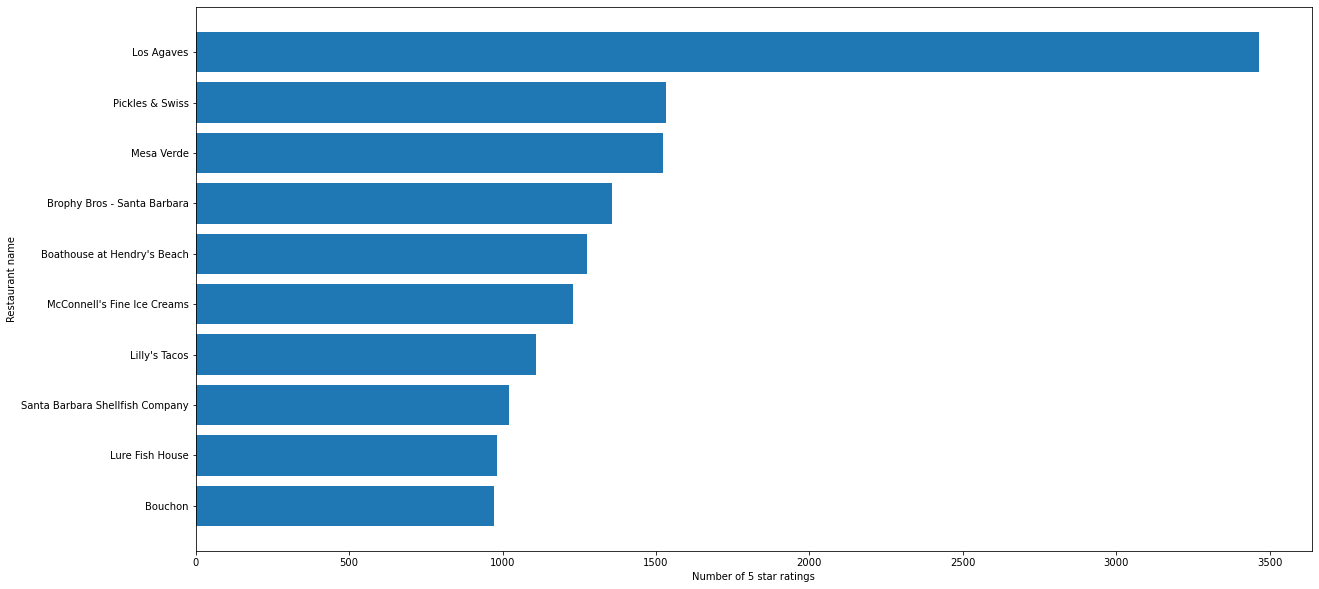

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
plt.barh(Five_star_rating.Restaurant, Five_star_rating.Counts, align = 'center', alpha = 1)
plt.ylabel('Restaurant name')
plt.xlabel('Number of 5 star ratings')
plt.savefig('5Star_ratings_restaurant_distribution_in_California.png')

#### From the above analysis we could infer that the restaurant Los Agaves got the highest amount of 5-star ratings in California.


### Analysing Restaurants in California who got the most reviews:

In [ ]:
ids = business_in_CA.business_id.to_list()
review_CA = reviews[reviews.business_id.isin(ids)]
review_CA = pd.merge(review_CA, business_in_CA[['business_id', 'name']], on = 'business_id', how = 'left')

#### Top 10 most reviewed restaurants in California:

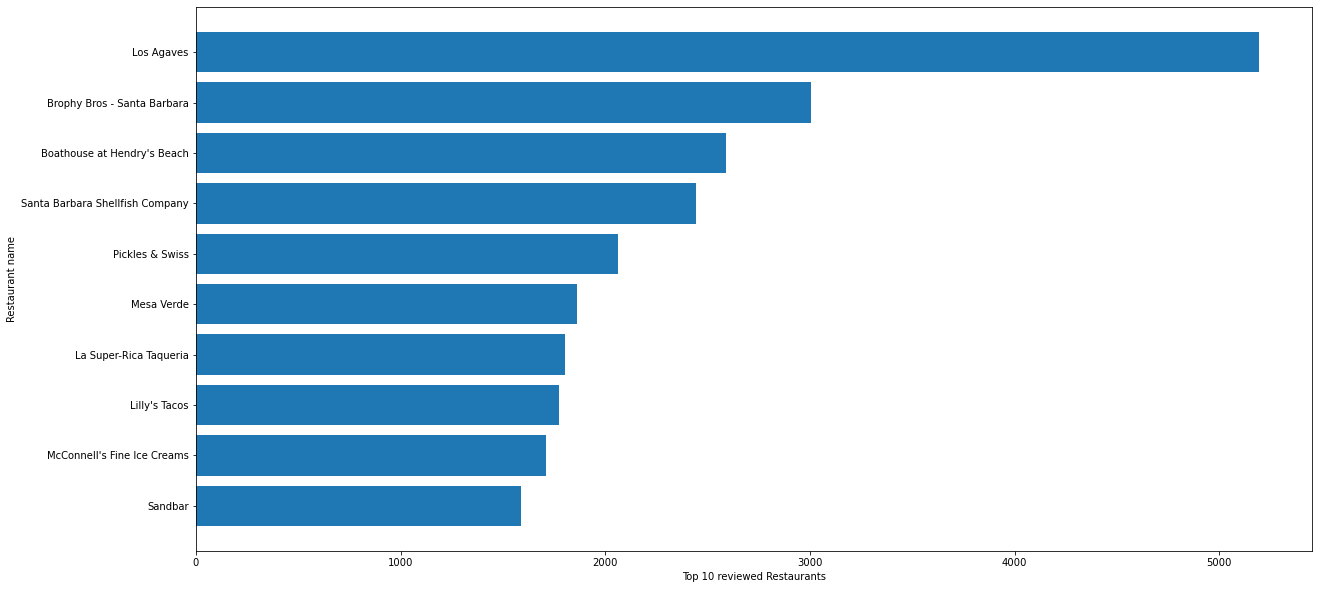

In [ ]:
top10_most_reviewed = review_CA.name.value_counts()
top10_most_reviewed = top10_most_reviewed.to_frame().reset_index()
top10_most_reviewed = top10_most_reviewed.head(10)
top10_most_reviewed.columns = ['name', 'Counts']
top10_most_reviewed = top10_most_reviewed.sort_values(['Counts'], ascending = True)
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
plt.barh(top10_most_reviewed.name, top10_most_reviewed.Counts, align = 'center', alpha = 1)
plt.ylabel('Restaurant name')
plt.xlabel('Top 10 reviewed Restaurants')
plt.savefig('most_reviewed_restaurants_in_CA.png')